In [2]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

%matplotlib inline

In [3]:
def get_spectrum_data_and_wavelength(file):
    spec_data = pf.getdata(file)
    spec_header = pf.getheader(file)
    
    wl_i = spec_header['CRVAL1'] # Coordinate value of position in degrees, specified in CRPIX.
    wl_step = spec_header['CDELT1'] # Increment-per-pixel of axis n, in degrees
    wavelength = np.arange(spec_data.size)*wl_step+wl_i
    
    return spec_data, wavelength

In [4]:
def normalize_spectrum(spec_data, wavelength, step = 0.05):
    wl_max = wavelength.max()
    wl_min = wavelength.min()
    flx_max = spec_data.max()
    flx_min = spec_data.min()
    
    interpolation_function = interp.interp1d(wavelength, spec_data) # INTERPOLATE TO SAME WAVELENGTH GRID 
    
    new_wavelength = np.arange(wl_min, wl_max, step)
    new_flux = np.arange(flx_min, flx_max)
    new_flux = interpolation_function(new_wavelength)
    
    return new_wavelength, new_flux

In [5]:
def plot_spectrum(new_wavelength, new_flux):
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.plot(new_wavelength, new_flux, '-')
    plt.xlabel(r"Wavelength ($\mathrm{\AA}$)")
    plt.ylabel(r"Flux")
    plt.show()

In [6]:
def plot_normalized_spectrum(new_wl, new_flux):
    plot_spectrum(new_wl, new_flux)
    print(new_wl[0], new_wl[-1])

In [7]:
def normalized_wavelength_and_flux(file):
    spec_data, wavelength = get_spectrum_data_and_wavelength(file)
    new_wl, new_flux = normalize_spectrum(spec_data, wavelength)
    
    return new_wl, new_flux

## HD110379

In [8]:
obs_HD110379 = 'spectra/HD110379/obs_HD110379_ordens_finalglue.fits'
tel_HD110379 = 'spectra/HD110379/tellstar_qvir_ordens_finalglue.fits'

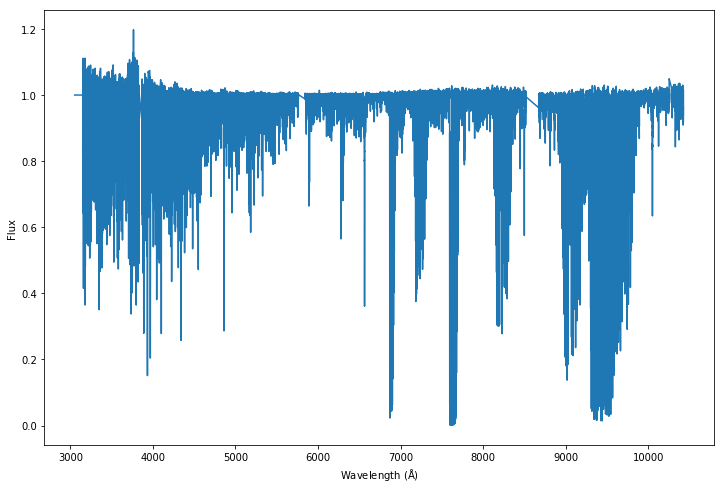

3052.0 10423.95000002682


In [10]:
new_wl_HD110379, obs_flux_HD110379 = normalized_wavelength_and_flux(obs_HD110379)
plot_normalized_spectrum(new_wl_HD110379, obs_flux_HD110379)

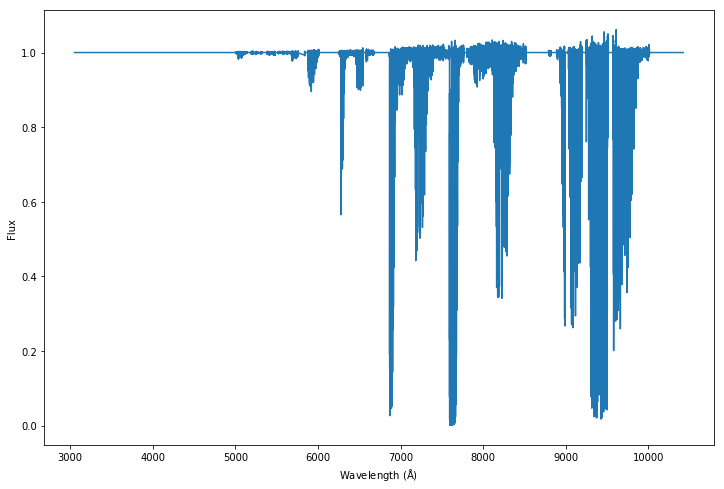

3052.0 10423.95000002682


In [11]:
_, tel_flux_HD110379 = normalized_wavelength_and_flux(tel_HD110379)
plot_normalized_spectrum(new_wl_HD110379, tel_flux_HD110379)

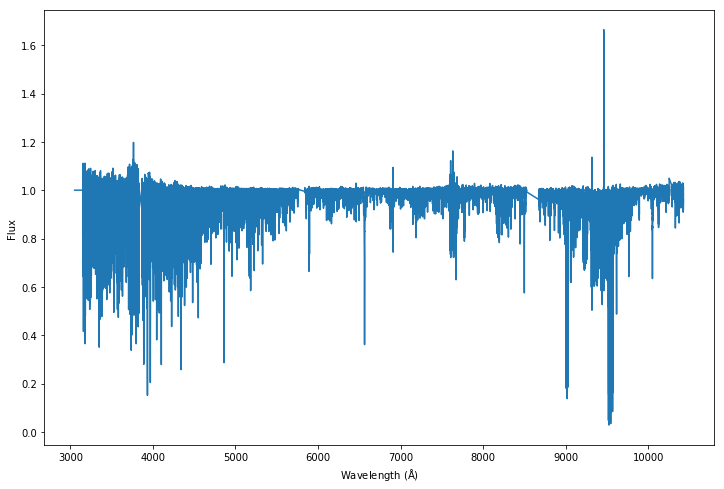

3052.0 10423.95000002682


In [12]:
divided_spectrum_HD110379 = obs_flux_HD110379 / tel_flux_HD110379
plot_normalized_spectrum(new_wl_HD110379, divided_spectrum_HD110379)

## HD186791

In [13]:
obs_HD186791 = 'spectra/HD186791/obs_HD186791_ordens_finalglue.fits'
tel_HD186791 = 'spectra/HD186791/tellstar_35aql_ordens_finalglue.fits'

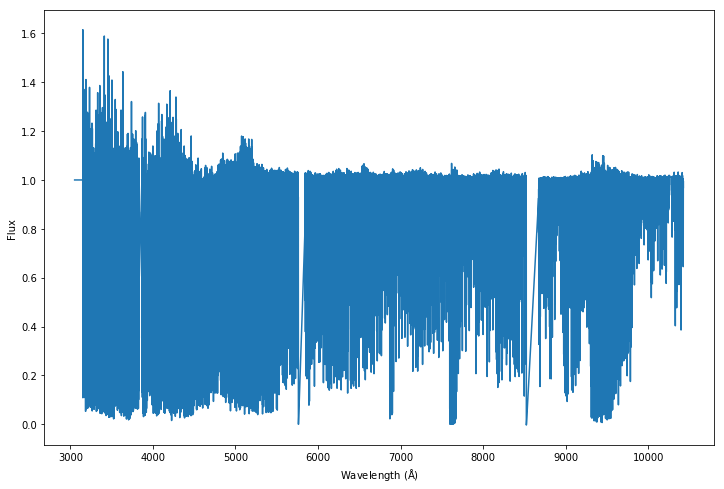

3052.0 10423.95000002682


In [14]:
new_wl_HD186791, obs_flux_HD186791 = normalized_wavelength_and_flux(obs_HD186791)
plot_normalized_spectrum(new_wl_HD186791, obs_flux_HD186791)

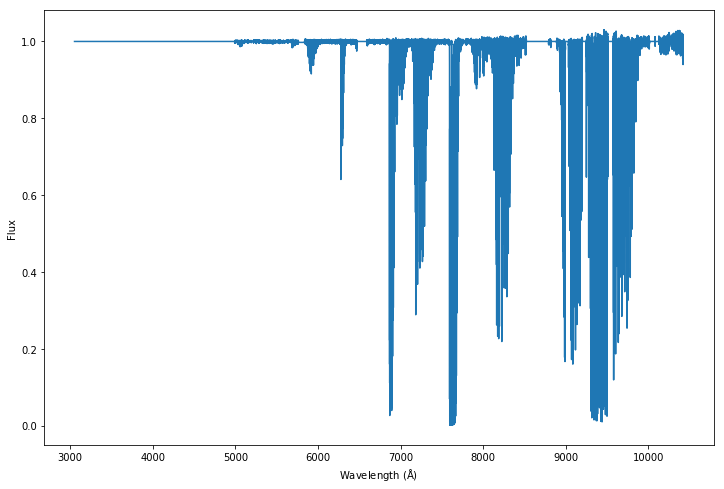

3052.0 10423.95000002682


In [15]:
_, tel_flux_HD186791 = normalized_wavelength_and_flux(tel_HD186791)
plot_normalized_spectrum(new_wl_HD186791, tel_flux_HD186791)

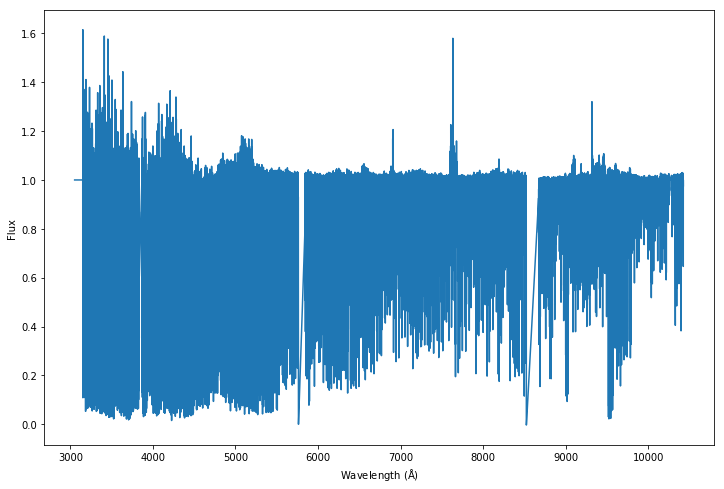

3052.0 10423.95000002682


In [16]:
divided_spectrum_HD186791 = obs_flux_HD186791 / tel_flux_HD186791
plot_normalized_spectrum(new_wl_HD186791, divided_spectrum_HD186791)

## ARDATA 

In [24]:
def zero_clip_flux(a):
    return np.clip(a, 0., None)

In [17]:
ardata = pf.open('spectra/ardata.fits')
data = ardata[1].data

wl_ardata = data['WAVELENGTH']
arcturus_flux = data['ARCTURUS']
solar_flux = data['SOLARFLUX']
tell_flux = data['TELLURIC']

In [18]:
wl_ardata

array([3726.7   , 3726.7045, 3726.7089, ..., 9299.9881, 9299.9993,
       9300.0104])

In [26]:
arcturus_flux = zero_clip_flux(arcturus_flux)
solar_flux = zero_clip_flux(solar_flux)
tell_flux = zero_clip_flux(tell_flux)

## SUN

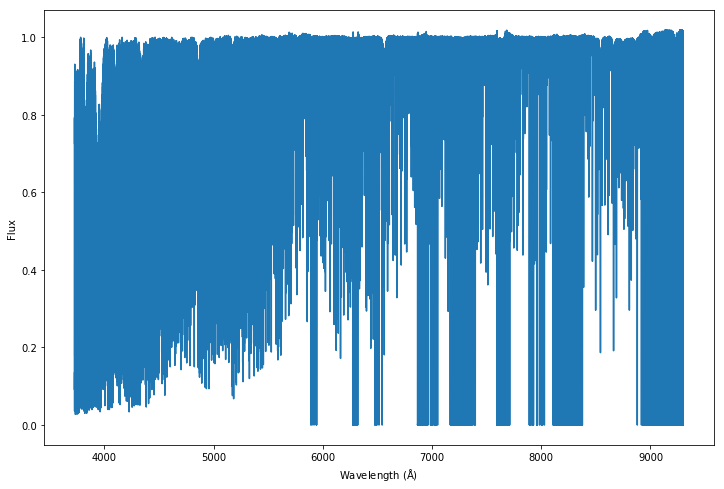

3726.7 9300.0104


In [28]:
plot_normalized_spectrum(wl_ardata, solar_flux)

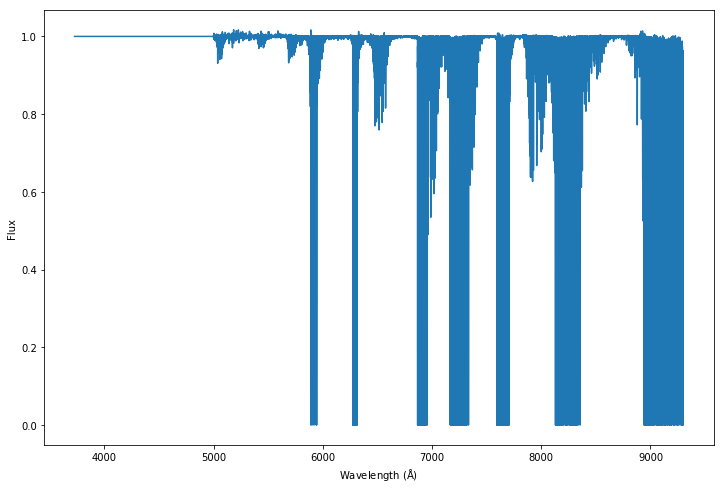

3726.7 9300.0104


In [30]:
plot_normalized_spectrum(wl_ardata, tell_flux)

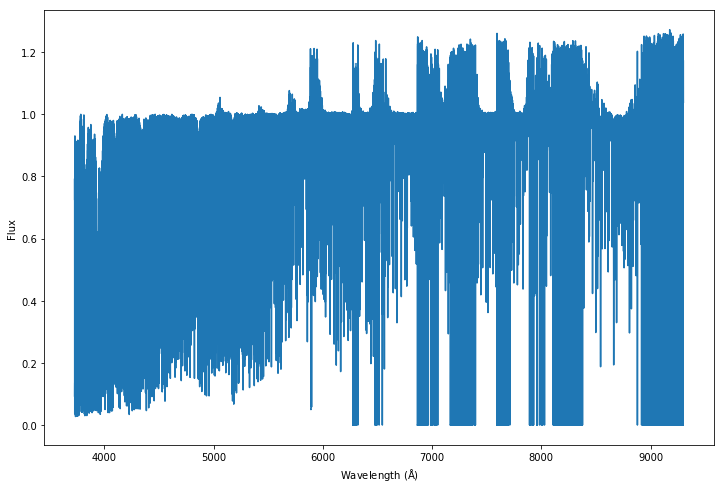

3726.7 9300.0104


In [31]:
divided_spectrum_sun = solar_flux / tell_flux
plot_normalized_spectrum(wl_ardata, divided_spectrum_sun)

## ARCTURUS

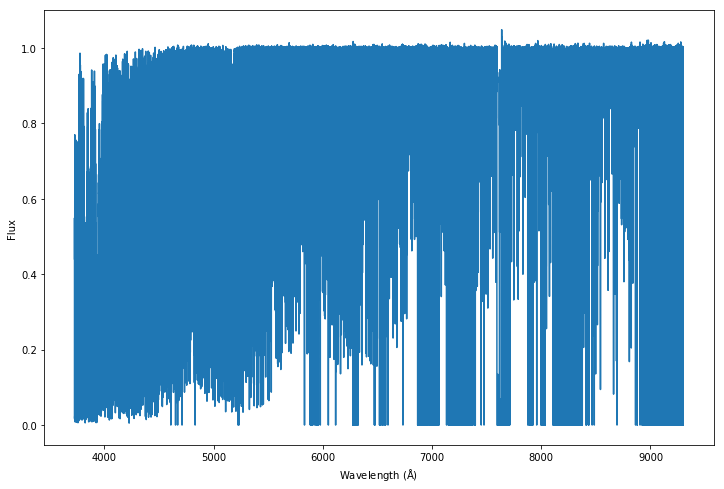

3726.7 9300.0104


In [32]:
plot_normalized_spectrum(wl_ardata, arcturus_flux)

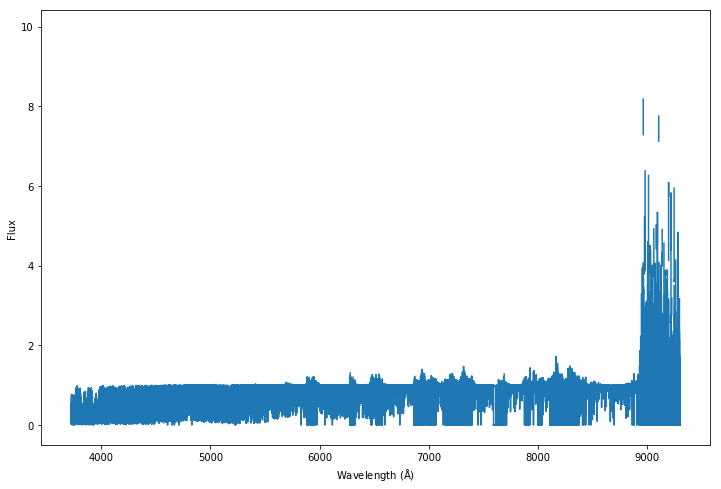

3726.7 9300.0104


In [33]:
divided_spectrum_arcturus = arcturus_flux / tell_flux
plot_normalized_spectrum(wl_ardata, divided_spectrum_arcturus)